In [1]:
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from math import sqrt, ceil

num_classes = 21
model = load_model('generator_model_20.h5',compile=False)

def generate_latent_points(dimensions, latent_dim, n_samples = 1, n_classes=num_classes):
	# generate points in the latent space
	random_latent_vectors = tf.random.normal(shape=(n_samples, latent_dim))
	labels = tf.keras.utils.to_categorical([dimensions for _ in range(n_samples)], n_classes)
	return tf.concat([random_latent_vectors, labels], 1)

2022-12-06 22:33:30.511176: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-06 22:33:30.511206: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-06 22:33:35.830291: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-06 22:33:35.830323: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jishnu): /proc/driver/nvidia/version does not exist
2022-12-06 22:33:35.830614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To 

In [2]:
def generate_matrices(dimensions, n_samples =1):
    if dimensions in range(num_classes):
        latent_dim = 400
        random_vector_labels = generate_latent_points(int(dimensions), latent_dim, int(n_samples))
        examples = model.predict(random_vector_labels)
        examples = examples * 255.0
        size = ceil(sqrt(n_samples))
        matrices = np.zeros((20*size, 20*size), dtype=float)
        n = 0
        for i in range(size):
            for j in range(size):
                if n == n_samples:
                    break
                matrices[i* 20 : (i+1)*20, j*20 : (j+1)*20] = examples[n, :, :, 0]
                n += 1
        # 255/2 = 127.5
        matrices = (matrices/127.5) -1
        return matrices


In [8]:
matrix = generate_matrices(15)

1/1 [==============================] - 0s 37ms/step


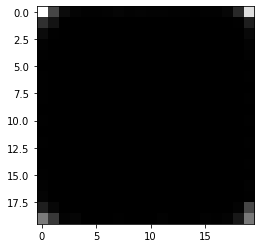

In [9]:
plt.imshow(matrix,cmap='gray')